<a href="https://colab.research.google.com/github/hhaemin/computer_vision/blob/main/orb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORB

#(an efficient alternative to SIFT or SURF)
Fast detector + Oriented BRIEF

FAST(Features from Accelerated Segment Test) 알고리즘, BRIEF(Binary Robust Independent Elementary Features) 알고리즘, 해리스 코너 알고리즘을 결합한 알고리즘

- ORB 알고리즘은 FAST 알고리즘을 사용해 특징점을 검출합니다.
- FAST 알고리즘은 코너뿐만 아니라 가장자리에도 반응하는 문제점으로 인해 해리스 코너 검출 알고리즘을 적용해 최상위 특징점만 추출합니다.
- 이 과정에서 이미지 피라미드를 구성해 스케일 공간 검색을 수행합니다.
- 이후 스케일 크기에 따라 피처 주변 박스 안의 강도 분포에 대해 X축과 Y축을 기준으로 1차 모멘트를 계산합니다.
- 1차 모멘트는 그레이디언트의 방향을 제공하므로 피처의 방향을 지정할 수 있습니다.
- 방향이 지정되면 해당 방향에 대해 피처 벡터를 계산할 수 있으며, 피처는 회전 불변성을 갖고 있으며 방향 정보를 포함하고 있습니다.
- 하나의 ORB 피처를 가져와 피처 주변의 박스에서 1차 모멘트와 방위 벡터를 계산합니다.
- 피처의 중심에서 모멘트가 가리키는 위치까지 벡터를 피처 방향으로 부여하게 됩니다. ORB의 기술자는 BRIEF 기술자에 없는 방향 정보를 갖고 있습니다.
- ORB 알고리즘은 SIFT(Scale-Invariant Feature Trasnform) 알고리즘과 SURF(Speeded-Up Robust Features) 알고리즘 을 대체하기 위해 OpenCV Labs에서 개발됐으며 속도 또한 더 빨라졌습니다.

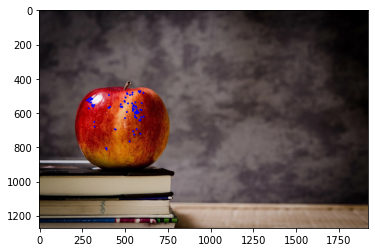

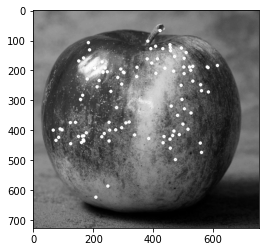

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("apple_books.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
target = cv2.imread("apple.jpg", cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,
)

kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(target, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) ## 

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

for i in matches[:100]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(src, (int(x1), int(y1)), 3, (255, 0, 0), 3)
    
    x2, y2 = kp2[idx].pt
    cv2.circle(target, (int(x2), int(y2)), 3, (255, 0, 0), 3)


plt.imshow(src[: ,:, ::-1])
plt.show()

plt.imshow(target[: ,:], 'gray')
plt.show()